In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import pprint
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn.svm import SVR

%matplotlib inline

In [2]:
# importing the dataset we prepared and saved using Data Cleaning Notebook
rice = pd.read_csv("/Users/macbook/Documents/BTP/Notebook/BTP/Satellite/Rice_Ready.csv")
rice = rice.drop(["Unnamed: 0"],axis=1)
rice.head()

,State_Name,ind_district,Crop_Year,Season,Crop,Area,Production,Value,X1,X2,...,11_B10_Mn,12_B1_Mn,12_B2_Mn,12_B3_Mn,12_B4_Mn,12_B5_Mn,12_B6_Mn,12_B7_Mn,12_B9_Mn,12_B10_Mn
0,Chandigarh,chandigarh,2005,kharif,Rice,50,250,5.00,400,500,...,10.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,Chandigarh,chandigarh,2007,kharif,Rice,50,250,5.00,250,250,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
2,Chandigarh,chandigarh,2008,kharif,Rice,20,100,5.00,250,250,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,Chandigarh,chandigarh,2009,kharif,Rice,20,100,5.00,100,250,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,Chandigarh,chandigarh,2010,kharif,Rice,20,103,5.15,100,100,...,10.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [3]:
colss = list(rice.columns.values)

In [4]:
len(colss)

334

### 334 = 10 + 216 + 108

In [5]:
select = colss[8:226]

In [6]:
X = rice[select]
y = rice["Value"]*1000

In [7]:
X.describe()

,X1,X2,1_B1_M,1_B1_V,1_B2_M,1_B2_V,1_B3_M,1_B3_V,1_B4_M,1_B4_V,...,12_B5_M,12_B5_V,12_B6_M,12_B6_V,12_B7_M,12_B7_V,12_B9_M,12_B9_V,12_B10_M,12_B10_V
count,3.280000e+02,3.280000e+02,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,1.950245e+05,1.919716e+05,9.182927,13.259146,6.496951,10.216463,7.277439,12.277439,10.829268,13.719512,...,4.385467,4.972324,12.556707,9.899831,2.426999,3.474390,14.232249,11.854234,221.661484,342.035772
std,2.925836e+05,2.925789e+05,25.121663,39.173220,20.421551,32.127405,22.737147,39.657315,26.708211,35.481149,...,12.157602,19.456249,25.190668,21.751825,8.235961,16.688323,27.993943,25.203706,180.640592,598.626471
min,2.000000e+00,6.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.400000e+04,1.528500e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.500000,22.000000
50%,8.149350e+04,7.543400e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,222.500000,157.500000
75%,2.586915e+05,2.510000e+05,0.000000,5.000000,0.000000,3.000000,0.000000,3.000000,2.000000,8.000000,...,0.000000,2.000000,9.000000,11.250000,0.000000,0.000000,10.750000,17.000000,329.750000,429.750000
max,1.710000e+06,1.710000e+06,208.000000,297.000000,181.000000,258.000000,201.000000,324.000000,215.000000,242.000000,...,70.000000,291.000000,125.000000,240.000000,55.000000,270.000000,141.000000,270.000000,771.000000,8040.000000


In [8]:
# Z-Score Normalization 

colms = list(X.columns)
for col in colms:
    col_zscore = col + '_zscore'
    X[col_zscore] = (X[col] - X[col].mean())/X[col].std(ddof=0)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
cols = list(X.columns.values)
len(cols)

436

In [32]:
# Contains all the features (Last 2 years Crop Production and the Satellite Data)
select = cols[218:436]
X_all = X[select]

# Just the last 2 years Crop Production
select1 = cols[218:220]
X_crp = X[select1]

# Just the Satellite Data
select2 = cols[220:436]
X_sat = X[select2]

# ---------------------------------------------------------------------
# With all the features together
# ---------------------------------------------------------------------

### Avg RMSE for Linear Regression

In [11]:
clf = LinearRegression()
scores = cross_val_score(clf, X_all, y, cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])
    
print(scores)
avg_rmse = scores.mean()
print("\nAvg RMSE is "+str(scores.mean()))

[ 391955.98677226   30716.17271021   32015.23840967   51595.08478481
   55681.15855367]

Avg RMSE is 112392.728246


/Users/macbook/Library/Python/2.7/lib/python/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## Support Vector Regression (SVR)

### RBF Kernel

In [12]:
# 5 Fold CV, to calculate avg RMSE
clf = SVR(C=8000.0, epsilon=0.1, kernel='rbf', gamma=0.001)
scores = cross_val_score(clf, X_all, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 1001.56936493   934.53462579   927.19294425   510.36585607   792.53322231]
('\n\nAvg RMSE is ', 833.23920267072026)


In [13]:
# 5 Fold CV, to calculate avg RMSE
clf = SVR(C=2000.0, epsilon=0.1, kernel='rbf', gamma=0.008)
scores = cross_val_score(clf, X_all, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[  899.97544879   877.1688262   1007.47422578   578.86809173   767.31332759]
('\n\nAvg RMSE is ', 826.15998401704314)


In [14]:
# 5 Fold CV, to calculate avg RMSE
clf = SVR(C=1000000.0, epsilon=0.1, kernel='rbf', gamma=0.000001)
scores = cross_val_score(clf, X_all, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[  786.16034517   885.43348522  1213.19019481   516.87862934   792.5500076 ]
('\n\nAvg RMSE is ', 838.84253242753005)


# ---------------------------------------------------------------------
# With only Last 2 Years Crop Production
# ---------------------------------------------------------------------

### Linear Regression

In [15]:
clf = LinearRegression()
scores = cross_val_score(clf, X_crp, y, cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])
    
print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 1065.63585702   857.23595343   822.13094399   554.39487643   704.46495431]
('\n\nAvg RMSE is ', 800.77251703573052)


## SVR

In [16]:
# 5 Fold CV, to calculate avg RMSE
clf = SVR(C=500000.0, epsilon=0.1, kernel='rbf', gamma=0.0008)
scores = cross_val_score(clf, X_crp, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 1122.52109861   782.51768706   818.44643068   558.35682966   597.68271737]
('\n\nAvg RMSE is ', 775.9049526763938)


In [17]:
# 5 Fold CV, to calculate avg RMSE
clf = SVR(C=8000.0, epsilon=0.1, kernel='rbf', gamma=0.01)
scores = cross_val_score(clf, X_crp, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 1124.94452355   789.3795181    635.23208725   568.28402579   603.87158373]
('\n\nAvg RMSE is ', 744.34234768539648)


# ---------------------------------------------------------------------
# With only Satellite Data
# ---------------------------------------------------------------------

### Avg RMSE for Linear Regression

In [18]:
clf = LinearRegression()
scores = cross_val_score(clf, X_sat, y, cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])
    
print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 1096649.30846409    57754.97135963    39092.52014173   111666.57491367
    69970.82187998]
('\n\nAvg RMSE is ', 275026.83935182099)


# Support Vector Regression (SVR)

### RBF Kernel

In [19]:
# 5 Fold CV, to calculate avg RMSE
clf = SVR(C=1000.0, epsilon=0.1, kernel='rbf', gamma=0.01)
scores = cross_val_score(clf, X_sat, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])

print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[  869.97972186   909.00034756  1356.3789098    669.4493212    748.80356142]
('\n\nAvg RMSE is ', 910.72237236657566)


# -----------------------------------------------------
# Dimension Reduction

In [20]:
from sklearn.decomposition import PCA

In [33]:
def fPCA(x): 
    pca = PCA(n_components=x)
    pcax = pca.fit_transform(X_all)

    # 5 Fold CV, to calculate avg RMSE
    clf = SVR(C=2000.0, epsilon=0.1, kernel='rbf', gamma=0.008)
    scores = cross_val_score(clf, pcax, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
    for i in range(0,5):
        scores[i] = sqrt(-1*scores[i])

    print(scores)
    avg_rmse = scores.mean()
    print("\n\nAvg RMSE is ",scores.mean())

In [34]:
fPCA(42)

[ 892.97364473  885.57712686  988.60029939  574.95550189  771.30844956]
('\n\nAvg RMSE is ', 822.68300448471223)


# ------------------------------------------------------
# XGBoost

In [35]:
import xgboost as xgb

In [36]:

# prepare dict of params for xgboost to run with
xgb_params = {
    'n_trees': 500, 
    'eta': 0.005,
    'max_depth': 4,
    'subsample': 0.95,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'base_score': np.mean(y), # base prediction = mean(target)
    'silent': 1
}

In [63]:
# form DMatrices for Xgboost training
dtrain = xgb.DMatrix(X_all, y)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=900, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=50, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

[0]	train-rmse:966.262	test-rmse:966.419
[50]	train-rmse:816.615	test-rmse:855.193
[100]	train-rmse:703.539	test-rmse:777.552
[150]	train-rmse:616.777	test-rmse:725.507
[200]	train-rmse:547.886	test-rmse:689.038
[250]	train-rmse:492.388	test-rmse:661.626
[300]	train-rmse:446.941	test-rmse:641.844
[350]	train-rmse:409.583	test-rmse:627.207
[400]	train-rmse:376.658	test-rmse:615.539
[450]	train-rmse:347.248	test-rmse:605.922
[500]	train-rmse:320.711	test-rmse:598.438
[550]	train-rmse:297.553	test-rmse:591.797
[600]	train-rmse:276.762	test-rmse:586.281
[650]	train-rmse:259.035	test-rmse:582.493
[700]	train-rmse:243.065	test-rmse:579.534
[750]	train-rmse:229.079	test-rmse:576.978
[800]	train-rmse:217.064	test-rmse:574.821
[850]	train-rmse:205.612	test-rmse:572.578
[899]	train-rmse:194.975	test-rmse:570.513
900


In [64]:
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)

In [65]:
from sklearn.metrics import r2_score
print(r2_score(dtrain.get_label(), model.predict(dtrain)))

0.938713324242


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=1)
dtest = xgb.DMatrix(X_test)

y_predict = model.predict(dtest)
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

244.756891596


# Now lets try not to Overfit.
### Learning XGBoost Model on split data

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=1936)

In [116]:
dtrain = xgb.DMatrix(X_train, y_train)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=700, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=50, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

[0]	train-rmse:988.272	test-rmse:986.911
[50]	train-rmse:831.605	test-rmse:879.427
[100]	train-rmse:710.039	test-rmse:806.874
[150]	train-rmse:615.341	test-rmse:761.009
[200]	train-rmse:538.258	test-rmse:730.731
[250]	train-rmse:475.6	test-rmse:709.475
[300]	train-rmse:422.922	test-rmse:694.765
[350]	train-rmse:379.103	test-rmse:684.504
[400]	train-rmse:341.745	test-rmse:676.853
[450]	train-rmse:309.816	test-rmse:672.719
[500]	train-rmse:282.825	test-rmse:670.187
[550]	train-rmse:259.145	test-rmse:669.404
[600]	train-rmse:238.886	test-rmse:668.687
[650]	train-rmse:220.75	test-rmse:668.264
[699]	train-rmse:205.179	test-rmse:667.093
700


In [117]:
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
print(r2_score(dtrain.get_label(), model.predict(dtrain)))

0.930678943995


In [118]:
dtest = xgb.DMatrix(X_test)

y_predict = model.predict(dtest)
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

494.503751917


In [120]:
avg_rmse = (481.67 + 542.952 + 577.985 + 544.2265 + 589.76 + 494.5)/6
avg_rmse

538.5155833333333

In [129]:
yt = y_test.as_matrix()
p = pd.DataFrame()
p["y_predicted"] = y_predict
p["y_test"] = yt

p["y_predicted"] = p["y_predicted"].round(decimals=1)
p["y_test"] = p["y_test"].round(decimals=1)
print p

    y_predicted  y_test
0   1814.300049  2497.6
1   2083.600098  1658.0
2   3483.899902  3444.5
3   3635.000000  3754.4
4   1421.699951  1254.0
5   2160.800049  1833.0
6   1984.199951  1196.7
7   2263.899902  2007.0
8   2838.199951  3483.3
9   2086.600098  1212.6
10  2394.500000  2288.0
11  3489.500000  3950.3
12  2514.600098  2747.0
13  3309.300049  3718.1
14  1435.300049  1567.1
15  2961.300049  2257.0
16  3062.600098  3318.5
17  2879.600098  2173.3
18  1486.900024  2000.0
19  2912.100098  2614.0
20  2089.199951  2266.4
21  2351.000000   726.7
22  2557.000000  2653.9
23  1971.099976  1461.6
24  3139.399902  3718.9
25  2065.899902  2008.0
26  2491.699951  2633.0
27  3655.000000  3357.2
28  4101.000000  4576.9
29  1458.500000  1807.5
..          ...     ...
36  1434.599976  1367.9
37  1680.699951  2087.8
38  1557.800049  1284.2
39  1534.199951  1358.9
40  2422.800049  2951.6
41  3028.600098  2663.7
42  1486.900024  1666.7
43  2118.500000  1884.8
44  2808.000000  2607.0
45  2256.399902 

# XGB with just 2 Features

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_crp, y, test_size=0.2, random_state=1)

In [131]:
dtrain = xgb.DMatrix(X_train, y_train)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=700, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=50, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

[0]	train-rmse:944.227	test-rmse:944.313
[50]	train-rmse:825.257	test-rmse:853.062
[100]	train-rmse:735.909	test-rmse:792.289
[150]	train-rmse:668.38	test-rmse:751.925
[200]	train-rmse:614.852	test-rmse:723.729
[250]	train-rmse:572.396	test-rmse:705.561
[300]	train-rmse:539.318	test-rmse:692.405
[350]	train-rmse:512.972	test-rmse:684.342
[400]	train-rmse:491.074	test-rmse:678.952
[450]	train-rmse:472.002	test-rmse:675.561
[500]	train-rmse:456.333	test-rmse:673.721
[550]	train-rmse:441.643	test-rmse:672.909
[600]	train-rmse:428.63	test-rmse:672.948
580


In [132]:
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
print(r2_score(dtrain.get_label(), model.predict(dtrain)))

0.744962712206


In [133]:
dtest = xgb.DMatrix(X_test)

y_predict2 = model.predict(dtest)
rmse = sqrt(mean_squared_error(y_predict2, y_test))
print(rmse)

739.892366597


# Lets check RMSE for SVR on just 2 features

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_crp, y, test_size=0.2, random_state=1)

clf = SVR(C=8000.0, epsilon=0.1, kernel='rbf', gamma=0.01)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

777.939254138


In [56]:
yt = y_test.as_matrix()
p = pd.DataFrame()
p["y_predicted"] = y_predict
p["y_test"] = yt

p["y_predicted"] = p["y_predicted"].round(decimals=1)
p["y_test"] = p["y_test"].round(decimals=1)
p.describe()

,y_predicted,y_test
count,66.000000,66.000000
mean,2587.830303,2651.320556
std,736.545480,1087.275670
min,2020.000000,1077.262693
25%,2079.250000,1750.887515
50%,2346.800000,2318.003603
75%,2740.325000,3576.059357
max,4624.700000,5150.000000


In [150]:
# print (p)

## SVR (Polynomial)

### All features

In [179]:
# 5 Fold CV, to calculate avg RMSE
clf = SVR(kernel='poly', gamma='auto', degree=4, coef0=6)
scores = cross_val_score(clf, X_all, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])
    
print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 1018.56596246   871.41412691  1089.24077669   498.344196     699.09853945]
('\n\nAvg RMSE is ', 835.33272030408114)


### Without Satellite Features

In [192]:
# 5 Fold CV, to calculate avg RMSE
clf = SVR(kernel='poly', gamma='auto', degree=3, coef0=6)
scores = cross_val_score(clf, X_crp, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])
    
print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[ 1120.15860545   791.50723759   698.21818209   564.55182209   606.2592614 ]
('\n\nAvg RMSE is ', 756.13902172169639)


## Ridge, Lasso on All features

## For X_all

In [218]:
from sklearn import linear_model

reg = linear_model.RidgeCV(alphas=[1,2,3,4,5,6,7,7.1,7.2,7.3,8,9,100,120,125,130,140,150])
reg.fit(X_all, y)
reg.alpha_

130.0

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=50)

reg = linear_model.Ridge(alpha = 130)
reg.fit (X_train, y_train)

y_pred = reg.predict(X_test)
rmse = sqrt(mean_squared_error(y_pred, y_test))
print(rmse)

792.258896478


Avg RMSE is is **700**

## For X_crp

In [232]:
from sklearn import linear_model

reg = linear_model.RidgeCV(alphas=[0.1,0.9,1,1.5,2,3,4,5,6,7,7.1,7.2,7.3,8,9,100,120,125,130,140,150])
reg.fit(X_crp, y)
reg.alpha_

1.0

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_crp, y, test_size=0.2, random_state=50)

reg = linear_model.Ridge(alpha = 1)
reg.fit (X_train, y_train)

y_pred = reg.predict(X_test)
rmse = sqrt(mean_squared_error(y_pred, y_test))
print(rmse)

825.182370294


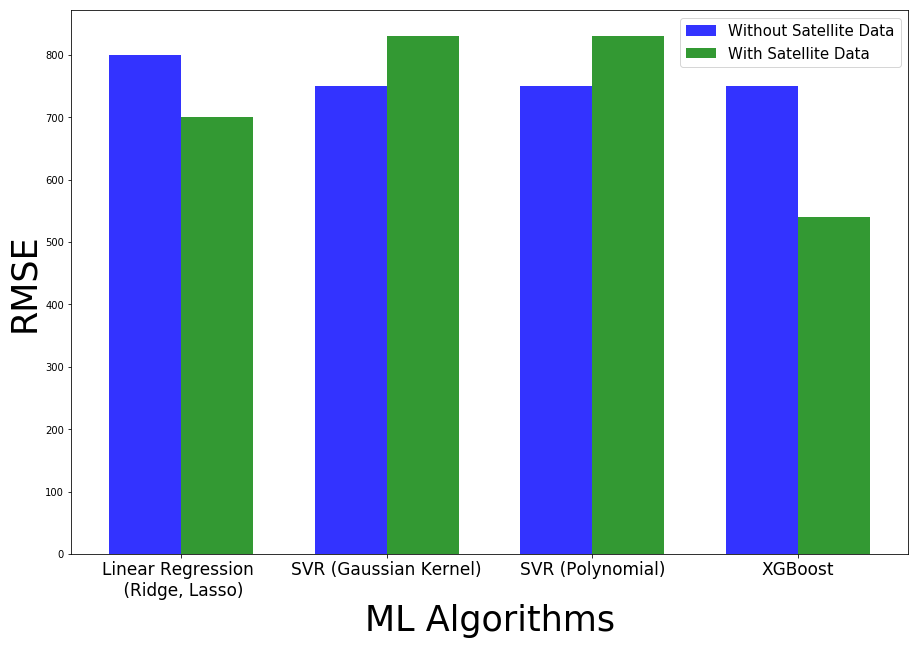

In [258]:
# data to plot
n_groups = 4
rmse_crp = (800, 750, 750, 750)
rmse_sat = (700, 830, 830, 540)
 
# create plot
# fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
plt.figure(figsize=(15,10))

rects1 = plt.bar(index, rmse_crp, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Without Satellite Data')
 
rects2 = plt.bar(index + bar_width, rmse_sat, bar_width,
                 alpha=opacity,
                 color='g',
                 label='With Satellite Data')
 
plt.xlabel('ML Algorithms', fontsize=35)
plt.ylabel('RMSE', fontsize=35)
# plt.title('Effect of Satellite Data', fontsize=45)
plt.xticks(index + bar_width/2, ('Linear Regression \n (Ridge, Lasso)', 'SVR (Gaussian Kernel)', 'SVR (Polynomial)', 'XGBoost'), fontsize=17)
plt.legend(fontsize=15)
 
# plt.tight_layout()
plt.show()

# XGBoost After Dimension Reduction

In [259]:
pca = PCA(n_components=42)
pcax = pca.fit_transform(X_all)

In [268]:
X_train, X_test, y_train, y_test = train_test_split(pcax, y, test_size=0.2)

In [269]:
dtrain = xgb.DMatrix(X_train, y_train)

# xgboost, cross-validation
cv_result = xgb.cv(xgb_params, 
                   dtrain, 
                   num_boost_round=700, # increase to have better results (~700)
                   early_stopping_rounds=50,
                   verbose_eval=50, 
                   show_stdv=False
                  )

num_boost_rounds = len(cv_result)
print(num_boost_rounds)

[0]	train-rmse:959.607	test-rmse:959.822
[50]	train-rmse:817.358	test-rmse:887.964
[100]	train-rmse:703.665	test-rmse:841.001
[150]	train-rmse:611.523	test-rmse:807.893
[200]	train-rmse:536.362	test-rmse:785.793
[250]	train-rmse:476.098	test-rmse:768.093
[300]	train-rmse:426.87	test-rmse:754.869
[350]	train-rmse:386.231	test-rmse:746.568
[400]	train-rmse:351.48	test-rmse:740.39
[450]	train-rmse:321.915	test-rmse:735.773
[500]	train-rmse:296.237	test-rmse:732.285
[550]	train-rmse:273.297	test-rmse:730.15
[600]	train-rmse:252.986	test-rmse:728.542
[650]	train-rmse:234.81	test-rmse:727.316
[699]	train-rmse:217.946	test-rmse:725.914
700


In [270]:
# train model
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=num_boost_rounds)
print(r2_score(dtrain.get_label(), model.predict(dtrain)))

0.921575717407


In [271]:
dtest = xgb.DMatrix(X_test)

y_predict = model.predict(dtest)
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

675.101747792


In [44]:
# # y_pred = model.predict(dtest)

# # 5 Fold CV, to calculate avg RMSE
# # clf = SVR(C=1000.0, epsilon=0.1, kernel='rbf', gamma=0.01)
# scores = cross_val_score(model, X_all, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')
# for i in range(0,5):
#     scores[i] = sqrt(-1*scores[i])
    
# print(scores)
# avg_rmse = scores.mean()
# print("\n\nAvg RMSE is ",scores.mean())